# Monday, March 3rd

**Exercise.** Write a function `mayfly_model` that takes in an initial population `y0`, a growth rate `b`, and an integer `N`, and returns a list of $y_0$, $y_1$, $y_2$, .. $y_N$ where

$$ y_n = b(1- y_{n-1})y_{n-1}.$$

In [9]:
def mayfly_model(b,y0,N):
    y_list = [y0]
    for n in range(N):
        y_n = y_list[n]
        y_np1 = b*(1-y_n)*y_n
        y_list.append(y_np1)
    return y_list

In [10]:
mayfly_pop = mayfly_model(3, .25, 20)
mayfly_pop[:5]

[0.25, 0.5625, 0.73828125, 0.5796661376953125, 0.7309599195141345]

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mayfly population')

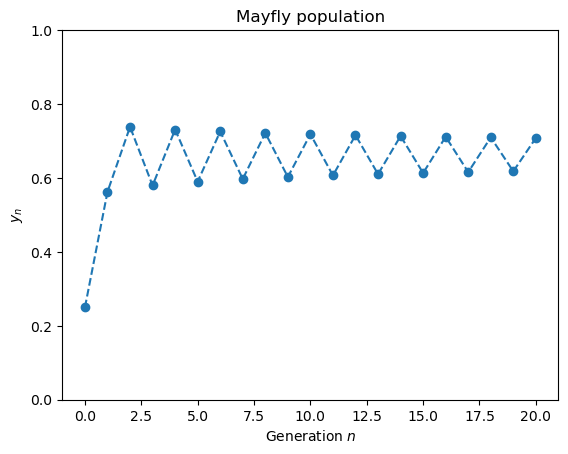

In [12]:
plt.plot(mayfly_pop,'o--')
plt.ylim(0,1)

plt.xlabel('Generation $n$')
plt.ylabel('$y_n$')
plt.title('Mayfly population')

Let's compare two mayfly populations: one with $b = 3$, $y_0 = .25$, and another with $b = 1.5$, $y_0 = .75$:

In [13]:
N = 20
b_list = [3, 1.5, 2.5]
y0_list = [.25, .75, .5]

n_list = np.arange(N+1)

mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list, y0_list)]

Text(0.5, 1.0, 'Mayfly population')

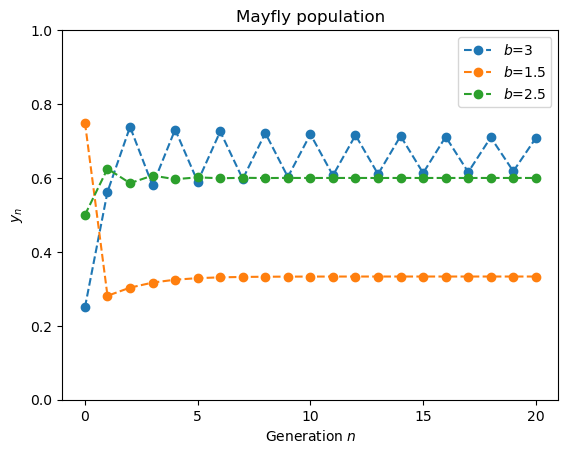

In [18]:
for b,y0,mayfly_pop in zip(b_list,y0_list,mayfly_pops):
    plt.plot(n_list, mayfly_pop,'o--',label='$b$={}'.format(b))

plt.legend()

plt.ylim(0,1)

plt.xticks(n_list[::5])

plt.xlabel('Generation $n$')
plt.ylabel('$y_n$')
plt.title('Mayfly population')

In [44]:
def plot_mayfly_pops(b_list, y0_list, N, title='Mayfly population'):
    n_list = np.arange(N+1)
    
    mayfly_pops = [mayfly_model(b,y0,N) for (b,y0) in zip(b_list, y0_list)]
    for b,y0,mayfly_pop in zip(b_list,y0_list,mayfly_pops):
        plt.plot(n_list, mayfly_pop,'o--',label='$b$={}'.format(b))

    plt.legend()
    plt.ylim(0,1)
    plt.xticks(n_list[::5])

    plt.xlabel('Generation $n$')
    plt.ylabel('$y_n$')
    plt.title(title)

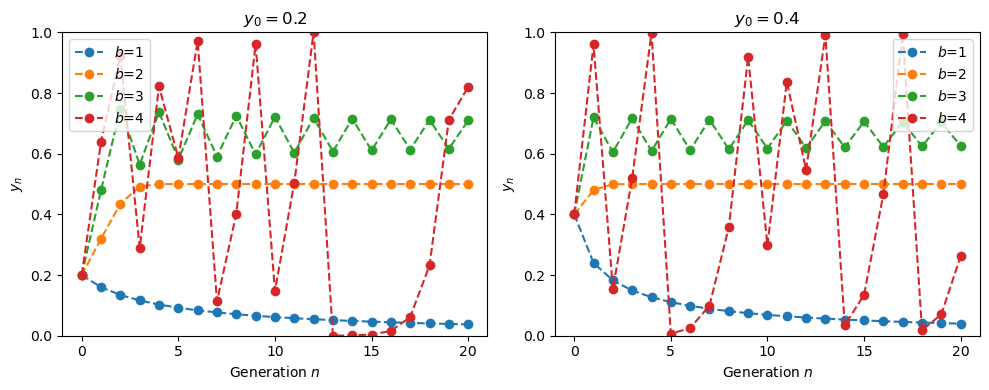

In [45]:
N = 20


fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
b_list = [1,2,3,4]
y0 = .2
y0_list = [y0 for b in b_list]
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0))

plt.subplot(1,2,2)
b_list = [1,2,3,4]
y0 = .4
y0_list = [y0 for b in b_list]
plot_mayfly_pops(b_list, y0_list, N, title='$y_0 = {}$'.format(y0))

plt.tight_layout()

**Exercise.** Modify the Lissajous curve slider code to plot mayfly model populations with sliders for $y_0$ and $b$:

Note: the `notebook` backend puts a interactives directly in the Jupyter notebook. We can alternatively use the `qt` backend to generate external interactive plots, which might run faster.

In [30]:
%matplotlib notebook

In [1]:
%matplotlib qt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from matplotlib.widgets import Slider  # import the Slider widget

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 5   # the value of the parameter a to be used initially, when the graph is created

b_min = 0
b_max = 10
b_init = 5

t = np.linspace(0, 2*np.pi, 1000)
x = np.sin(a_init*t)
y = np.cos(b_init*t)

fig = plt.figure(figsize=(4,4))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
lissajous_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
a_slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
b_slider_ax = plt.axes([0.1, 0, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(lissajous_ax) # select sin_ax
plt.title('x = sin(at), y = cos(bt)')
lissajous_plot, = plt.plot(x, y, 'r')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(a_slider_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

b_slider = Slider(b_slider_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(dummy):
    # We can access the current value of any slider using <slider>.val
    # E.g. a_slider.val gives the current value of the a_slider
    # b_slider.val gives the current value of the b_slider
    x = np.sin(a_slider.val*t)
    y = np.cos(b_slider.val*t)
    lissajous_plot.set_xdata(x) # set new y-coordinates of the plotted points
    lissajous_plot.set_ydata(y)
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

Note: We can disable interactive mode and return to normal mode using the magic `%matplotlib inline`

In [5]:
%matplotlib inline

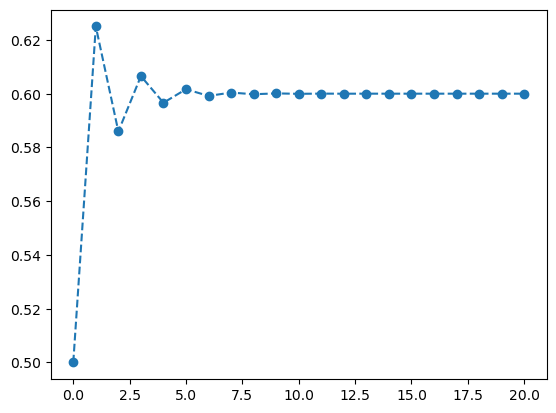

In [29]:
plt.plot(mayfly_pop,'o--')